# Steel Plates Faults - Logistic Regression
- **Îç∞Ïù¥ÌÑ∞ÏÖã Ï∂úÏ≤ò**: [UCI ML Repository - Steel Plates Faults](https://archive.ics.uci.edu/dataset/198/steel+plates+faults)
- **Î∂ÑÏÑù Î™©Ï†Å**: ÌÜµÍ≥Ñ Í∏∞Î∞ò Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ Í∞Å Í≤∞Ìï® Ïú†Ìòï(Y Î≥ÄÏàò: Z_Scratch, K_Scratch)Ïùò Î∞úÏÉù Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÍ≥†, Ïú†ÏùòÎØ∏Ìïú ÏÑ§Î™Ö Î≥ÄÏàòÎ•º ÎèÑÏ∂ú
- **Î∂ÑÏÑù Ï†àÏ∞®**:
  1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Íµ¨Ï°∞ ÌôïÏù∏
  2. EDAÎ•º ÌÜµÌïú Ïú†Ìö® Î≥ÄÏàò ÌÉêÏÉâ
  3. Î≥ÄÏàò ÏÑ†Ï†ïÏùÑ Í∏∞Î∞òÏúºÎ°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
  4. ÏµúÏ¢Ö ÌöåÍ∑ÄÏãù ÎèÑÏ∂ú Î∞è Í≤∞Í≥º Ìï¥ÏÑù

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Loading

In [ ]:
from ucimlrepo import fetch_ucirepo

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
steel_plates_faults = fetch_ucirepo(id=198)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = steel_plates_faults.data.features    # ÏÑ§Î™Ö Î≥ÄÏàò 
y = steel_plates_faults.data.targets     # ÌÉÄÍ≤ü Î≥ÄÏàò 

# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏
print(steel_plates_faults.metadata)
print(steel_plates_faults.variables)

# ÏÉÅÏúÑ 5Í∞ú Ìñâ ÌôïÏù∏
X.head().T

{'uci_id': 198, 'name': 'Steel Plates Faults', 'repository_url': 'https://archive.ics.uci.edu/dataset/198/steel+plates+faults', 'data_url': 'https://archive.ics.uci.edu/static/public/198/data.csv', 'abstract': 'A dataset of steel plates√¢‚Ç¨‚Ñ¢ faults, classified into 7 different types. \nThe goal was to train machine learning for automatic pattern recognition.\n', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1941, 'num_features': 27, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2010, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5J88N', 'creators': ['M Buscema', 'S Terzi', 'W Tastle'], 'intro_paper': None, 'additional_info': {'summary': 'Type of dependent variables (7 Types of Steel Pl

0             1             2            3  \
X_Minimum                  42.0000  6.450000e+02  8.290000e+02     853.0000   
X_Maximum                  50.0000  6.510000e+02  8.350000e+02     860.0000   
Y_Minimum              270900.0000  2.538079e+06  1.553913e+06  369370.0000   
Y_Maximum              270944.0000  2.538108e+06  1.553931e+06  369415.0000   
Pixels_Areas              267.0000  1.080000e+02  7.100000e+01     176.0000   
X_Perimeter                17.0000  1.000000e+01  8.000000e+00      13.0000   
Y_Perimeter                44.0000  3.000000e+01  1.900000e+01      45.0000   
Sum_of_Luminosity       24220.0000  1.139700e+04  7.972000e+03   18996.0000   
Maximum_of_Luminosity     108.0000  1.230000e+02  1.250000e+02     126.0000   
Length_of_Conveyer       1687.0000  1.687000e+03  1.623000e+03    1353.0000   
TypeOfSteel_A300            1.0000  1.000000e+00  1.000000e+00       0.0000   
TypeOfSteel_A400            0.0000  0.000000e+00  0.000000e+00       1.0000   
Steel_Plate_Thickness      80.0000  8.000000e+01  1.000000e+02     290.0000   
Edges_Index                 0.0498  7.647000e-01  9.710000e-01       0.7287   
Empty_Index                 0.2415  3.793000e-01  3.426000e-01       0.4413   
Square_Index                0.1818  2.069000e-01  3.333000e-01       0.1556   
Outside_X_Index             0.0047  3.600000e-03  3.700000e-03       0.0052   
Edges_X_Index               0.4706  6.000000e-01  7.500000e-01       0.5385   
Edges_Y_Index               1.0000  9.667000e-01  9.474000e-01       1.0000   
Outside_Global_Index        1.0000  1.000000e+00  1.000000e+00       1.0000   
LogOfAreas                  2.4265  2.033400e+00  1.851300e+00       2.2455   
Log_X_Index                 0.9031  7.782000e-01  7.782000e-01       0.8451   
Log_Y_Index                 1.6435  1.462400e+00  1.255300e+00       1.6532   
Orientation_Index           0.8182  7.931000e-01  6.667000e-01       0.8444   
Luminosity_Index           -0.2913 -1.756000e-01 -1.228000e-01      -0.1568   
SigmoidOfAreas              0.5822  2.984000e-01  2.150000e-01       0.5212   
Minimum_of_Luminosity      76.0000  8.400000e+01  9.900000e+01      99.0000   

                                 4  
X_Minimum                1289.0000  
X_Maximum                1306.0000  
Y_Minimum              498078.0000  
Y_Maximum              498335.0000  
Pixels_Areas             2409.0000  
X_Perimeter                60.0000  
Y_Perimeter               260.0000  
Sum_of_Luminosity      246930.0000  
Maximum_of_Luminosity     126.0000  
Length_of_Conveyer       1353.0000  
TypeOfSteel_A300            0.0000  
TypeOfSteel_A400            1.0000  
Steel_Plate_Thickness     185.0000  
Edges_Index                 0.0695  
Empty_Index                 0.4486  
Square_Index                0.0662  
Outside_X_Index             0.0126  
Edges_X_Index               0.2833  
Edges_Y_Index               0.9885  
Outside_Global_Index        1.0000  
LogOfAreas                  3.3818  
Log_X_Index                 1.2305  
Log_Y_Index                 2.4099  
Orientation_Index           0.9338  
Luminosity_Index           -0.1992  
SigmoidOfAreas              1.0000  
Minimum_of_Luminosity      37.0000

# Preprocessing
- Í≤∞Ï∏°Ïπò Ïú†Î¨¥ ÌôïÏù∏
- X, y Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ ÌôïÏù∏
- ÏÑ§Î™Ö Î≥ÄÏàòÎì§Ïùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏

In [7]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (X):")
print(X.isnull().sum())

print("Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (y):")
print(y.isnull().sum())

# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏
print(X.shape, y.shape)

# Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
X.describe().T  

Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (X):
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Minimum_of_Luminosity    0
dtype: int64
Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (y):
Pastry          0
Z_Scratch       0
K_Scratch       0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64
(1941, 27) (1941, 7)


count          mean           std        min  \
X_Minimum              1941.0  5.711360e+02  5.206907e+02     0.0000   
X_Maximum              1941.0  6.179645e+02  4.976274e+02     4.0000   
Y_Minimum              1941.0  1.650685e+06  1.774578e+06  6712.0000   
Y_Maximum              1941.0  1.650739e+06  1.774590e+06  6724.0000   
Pixels_Areas           1941.0  1.893878e+03  5.168460e+03     2.0000   
X_Perimeter            1941.0  1.118552e+02  3.012092e+02     2.0000   
Y_Perimeter            1941.0  8.296600e+01  4.264829e+02     1.0000   
Sum_of_Luminosity      1941.0  2.063121e+05  5.122936e+05   250.0000   
Maximum_of_Luminosity  1941.0  1.301937e+02  1.869099e+01    37.0000   
Length_of_Conveyer     1941.0  1.459160e+03  1.445778e+02  1227.0000   
TypeOfSteel_A300       1941.0  4.003091e-01  4.900872e-01     0.0000   
TypeOfSteel_A400       1941.0  5.996909e-01  4.900872e-01     0.0000   
Steel_Plate_Thickness  1941.0  7.873776e+01  5.508603e+01    40.0000   
Edges_Index            1941.0  3.317152e-01  2.997117e-01     0.0000   
Empty_Index            1941.0  4.142033e-01  1.372615e-01     0.0000   
Square_Index           1941.0  5.707671e-01  2.710584e-01     0.0083   
Outside_X_Index        1941.0  3.336110e-02  5.896117e-02     0.0015   
Edges_X_Index          1941.0  6.105286e-01  2.432769e-01     0.0144   
Edges_Y_Index          1941.0  8.134722e-01  2.342736e-01     0.0484   
Outside_Global_Index   1941.0  5.757342e-01  4.823520e-01     0.0000   
LogOfAreas             1941.0  2.492388e+00  7.889299e-01     0.3010   
Log_X_Index            1941.0  1.335686e+00  4.816116e-01     0.3010   
Log_Y_Index            1941.0  1.403271e+00  4.543452e-01     0.0000   
Orientation_Index      1941.0  8.328764e-02  5.008680e-01    -0.9910   
Luminosity_Index       1941.0 -1.313050e-01  1.487668e-01    -0.9989   
SigmoidOfAreas         1941.0  5.854205e-01  3.394518e-01     0.1190   
Minimum_of_Luminosity  1941.0  8.454869e+01  3.213428e+01     0.0000   

                               25%           50%           75%           max  
X_Minimum                  51.0000  4.350000e+02  1.053000e+03  1.705000e+03  
X_Maximum                 192.0000  4.670000e+02  1.072000e+03  1.713000e+03  
Y_Minimum              471253.0000  1.204128e+06  2.183073e+06  1.298766e+07  
Y_Maximum              471281.0000  1.204136e+06  2.183084e+06  1.298769e+07  
Pixels_Areas               84.0000  1.740000e+02  8.220000e+02  1.526550e+05  
X_Perimeter                15.0000  2.600000e+01  8.400000e+01  1.044900e+04  
Y_Perimeter                13.0000  2.500000e+01  8.300000e+01  1.815200e+04  
Sum_of_Luminosity        9522.0000  1.920200e+04  8.301100e+04  1.159141e+07  
Maximum_of_Luminosity     124.0000  1.270000e+02  1.400000e+02  2.530000e+02  
Length_of_Conveyer       1358.0000  1.364000e+03  1.650000e+03  1.794000e+03  
TypeOfSteel_A300            0.0000  0.000000e+00  1.000000e+00  1.000000e+00  
TypeOfSteel_A400            0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
Steel_Plate_Thickness      40.0000  7.000000e+01  8.000000e+01  3.000000e+02  
Edges_Index                 0.0604  2.273000e-01  5.738000e-01  9.952000e-01  
Empty_Index                 0.3158  4.121000e-01  5.016000e-01  9.439000e-01  
Square_Index                0.3613  5.556000e-01  8.182000e-01  1.000000e+00  
Outside_X_Index             0.0066  1.010000e-02  2.350000e-02  8.759000e-01  
Edges_X_Index               0.4118  6.364000e-01  8.000000e-01  1.000000e+00  
Edges_Y_Index               0.5968  9.474000e-01  1.000000e+00  1.000000e+00  
Outside_Global_Index        0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
LogOfAreas                  1.9243  2.240600e+00  2.914900e+00  5.183700e+00  
Log_X_Index                 1.0000  1.176100e+00  1.518500e+00  3.074100e+00  
Log_Y_Index                 1.0792  1.322200e+00  1.732400e+00  4.258700e+00  
Orientation_Index          -0.3333  9.520000e-02  5.116000e-01  9.917000e-01  
Luminosity_Index           -0.19

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (X):")
print(X.isnull().sum())

print("Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (y):")
print(y.isnull().sum())

# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏
print(X.shape, y.shape)

# Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
X.describe().T  

Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (X):
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Minimum_of_Luminosity    0
dtype: int64
Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä (y):
Pastry          0
Z_Scratch       0
K_Scratch       0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64
(1941, 27) (1941, 7)


count          mean           std        min  \
X_Minimum              1941.0  5.711360e+02  5.206907e+02     0.0000   
X_Maximum              1941.0  6.179645e+02  4.976274e+02     4.0000   
Y_Minimum              1941.0  1.650685e+06  1.774578e+06  6712.0000   
Y_Maximum              1941.0  1.650739e+06  1.774590e+06  6724.0000   
Pixels_Areas           1941.0  1.893878e+03  5.168460e+03     2.0000   
X_Perimeter            1941.0  1.118552e+02  3.012092e+02     2.0000   
Y_Perimeter            1941.0  8.296600e+01  4.264829e+02     1.0000   
Sum_of_Luminosity      1941.0  2.063121e+05  5.122936e+05   250.0000   
Maximum_of_Luminosity  1941.0  1.301937e+02  1.869099e+01    37.0000   
Length_of_Conveyer     1941.0  1.459160e+03  1.445778e+02  1227.0000   
TypeOfSteel_A300       1941.0  4.003091e-01  4.900872e-01     0.0000   
TypeOfSteel_A400       1941.0  5.996909e-01  4.900872e-01     0.0000   
Steel_Plate_Thickness  1941.0  7.873776e+01  5.508603e+01    40.0000   
Edges_Index            1941.0  3.317152e-01  2.997117e-01     0.0000   
Empty_Index            1941.0  4.142033e-01  1.372615e-01     0.0000   
Square_Index           1941.0  5.707671e-01  2.710584e-01     0.0083   
Outside_X_Index        1941.0  3.336110e-02  5.896117e-02     0.0015   
Edges_X_Index          1941.0  6.105286e-01  2.432769e-01     0.0144   
Edges_Y_Index          1941.0  8.134722e-01  2.342736e-01     0.0484   
Outside_Global_Index   1941.0  5.757342e-01  4.823520e-01     0.0000   
LogOfAreas             1941.0  2.492388e+00  7.889299e-01     0.3010   
Log_X_Index            1941.0  1.335686e+00  4.816116e-01     0.3010   
Log_Y_Index            1941.0  1.403271e+00  4.543452e-01     0.0000   
Orientation_Index      1941.0  8.328764e-02  5.008680e-01    -0.9910   
Luminosity_Index       1941.0 -1.313050e-01  1.487668e-01    -0.9989   
SigmoidOfAreas         1941.0  5.854205e-01  3.394518e-01     0.1190   
Minimum_of_Luminosity  1941.0  8.454869e+01  3.213428e+01     0.0000   

                               25%           50%           75%           max  
X_Minimum                  51.0000  4.350000e+02  1.053000e+03  1.705000e+03  
X_Maximum                 192.0000  4.670000e+02  1.072000e+03  1.713000e+03  
Y_Minimum              471253.0000  1.204128e+06  2.183073e+06  1.298766e+07  
Y_Maximum              471281.0000  1.204136e+06  2.183084e+06  1.298769e+07  
Pixels_Areas               84.0000  1.740000e+02  8.220000e+02  1.526550e+05  
X_Perimeter                15.0000  2.600000e+01  8.400000e+01  1.044900e+04  
Y_Perimeter                13.0000  2.500000e+01  8.300000e+01  1.815200e+04  
Sum_of_Luminosity        9522.0000  1.920200e+04  8.301100e+04  1.159141e+07  
Maximum_of_Luminosity     124.0000  1.270000e+02  1.400000e+02  2.530000e+02  
Length_of_Conveyer       1358.0000  1.364000e+03  1.650000e+03  1.794000e+03  
TypeOfSteel_A300            0.0000  0.000000e+00  1.000000e+00  1.000000e+00  
TypeOfSteel_A400            0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
Steel_Plate_Thickness      40.0000  7.000000e+01  8.000000e+01  3.000000e+02  
Edges_Index                 0.0604  2.273000e-01  5.738000e-01  9.952000e-01  
Empty_Index                 0.3158  4.121000e-01  5.016000e-01  9.439000e-01  
Square_Index                0.3613  5.556000e-01  8.182000e-01  1.000000e+00  
Outside_X_Index             0.0066  1.010000e-02  2.350000e-02  8.759000e-01  
Edges_X_Index               0.4118  6.364000e-01  8.000000e-01  1.000000e+00  
Edges_Y_Index               0.5968  9.474000e-01  1.000000e+00  1.000000e+00  
Outside_Global_Index        0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
LogOfAreas                  1.9243  2.240600e+00  2.914900e+00  5.183700e+00  
Log_X_Index                 1.0000  1.176100e+00  1.518500e+00  3.074100e+00  
Log_Y_Index                 1.0792  1.322200e+00  1.732400e+00  4.258700e+00  
Orientation_Index          -0.3333  9.520000e-02  5.116000e-01  9.917000e-01  
Luminosity_Index           -0.19

# EDA

- Í∞Å Í≤∞Ìï® Ïú†Ìòï(Z_Scratch, K_Scratch)Ïóê Îî∞Îùº Í¥ÄÎ†®ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎ•º Ï∞æÍ≥† ÏãúÍ∞ÅÌôî
- HeatmapÏùÑ ÌÜµÌï¥ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î∂ÑÏÑù
- BoxplotÏúºÎ°ú Î≥ÄÏàòÏôÄ ÌÉÄÍ≤ü Í∞Ñ Íµ¨Î∂Ñ Í∞ÄÎä•ÏÑ± ÌôïÏù∏

## Z_Scratch Î∂ÑÏÑù

Z_ScratchÏùò Î∞úÏÉù Ïú†Î¨¥ÏôÄ Í¥ÄÎ†®ÌïòÏó¨ Ïñ¥Îñ§ Î≥ÄÏàòÎì§Ïù¥ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùÑÏßÄÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥, Í∞Å Î≥ÄÏàòÏôÄ Z_Scratch Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌïú heatmapÏùÑ ÏÉùÏÑ±ÌïòÏòÄÎã§.

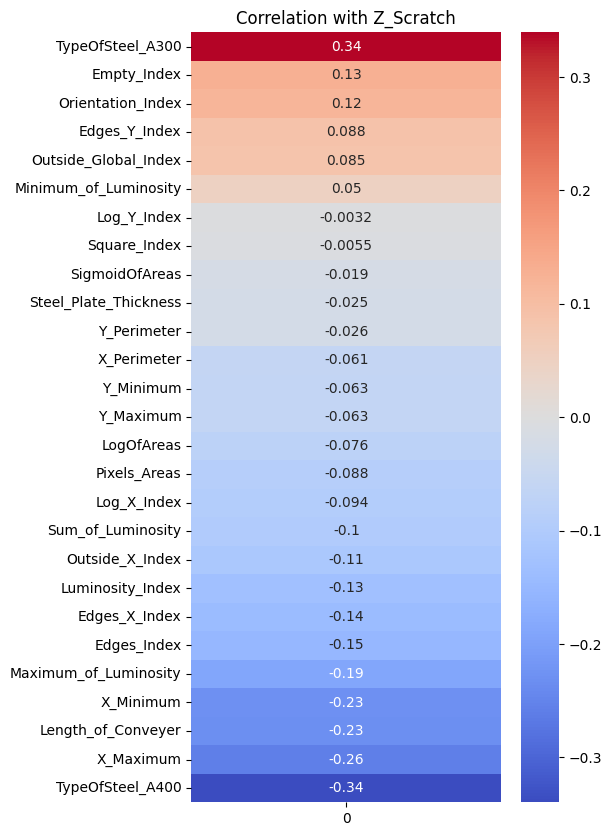

In [20]:
# Z_Scratch Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_z = X.corrwith(y['Z_Scratch']).sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5, 10))
sns.heatmap(corr_z.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Z_Scratch')
plt.show()

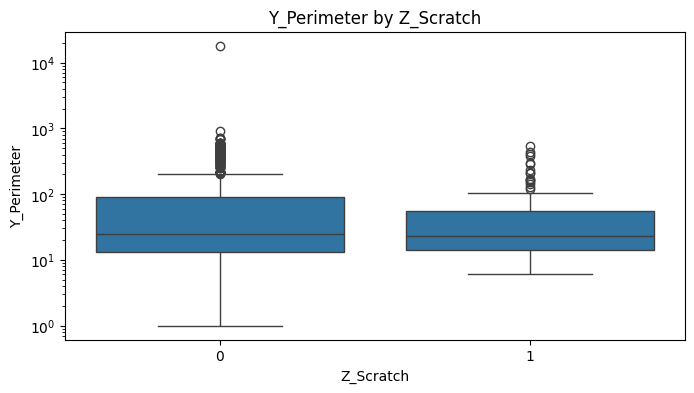

In [ ]:
# Z_Scratch = 0 / 1 Íµ¨Î∂ÑÏù¥ Ïûò ÎêòÎäî ÌõÑÎ≥¥ Î≥ÄÏàò Ï∞æÍ∏∞
# ÌõÑÎ≥¥ 1: Y_Perimeter
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['Z_Scratch'], y=X['Y_Perimeter'])
plt.title('Y_Perimeter by Z_Scratch')
plt.xlabel('Z_Scratch')
plt.ylabel('Y_Perimeter')
plt.yscale('log')  # Ïù¥ÏÉÅÏπò ÎåÄÎπÑ
plt.show()

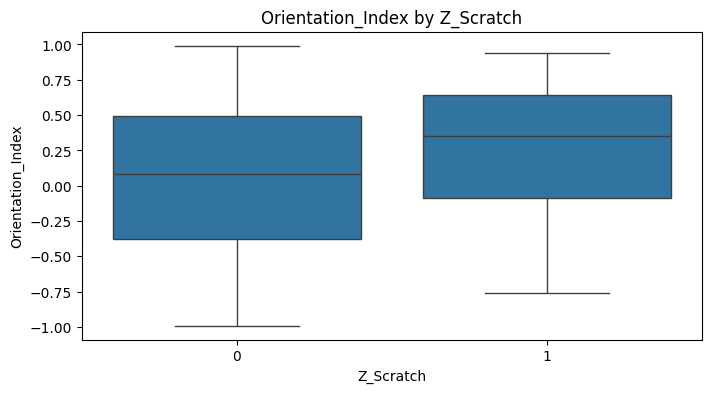

In [11]:
# ÌõÑÎ≥¥ 2: Orientation_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['Z_Scratch'], y=X['Orientation_Index'])
plt.title('Orientation_Index by Z_Scratch')
plt.xlabel('Z_Scratch')
plt.ylabel('Orientation_Index')
plt.show()

### Z_ScratchÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Heatmap

Z_ScratchÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ìé∏Ïù¥ÏßÄÎßå, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Í∞íÏùÑ Î≥¥Ïù∏ Î≥ÄÏàòÎì§ Ï§ë ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî ÏïÑÎûò 2Í∞úÏùò Î≥ÄÏàòÎ•º ÌõÑÎ≥¥Î°ú ÏÑ†Ï†ïÌïòÏòÄÎã§.

- `Y_Perimeter`  
- `Orientation_Index`


### ÌõÑÎ≥¥ Î≥ÄÏàò ÏãúÍ∞ÅÌôî Î∞è Ìï¥ÏÑù

Í∞Å Î≥ÄÏàòÏôÄ Z_Scratch Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º boxplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìï¥ÏÑùÏù¥ Í∞ÄÎä•ÌïòÎã§:

| Î≥ÄÏàòÎ™Ö              | Ìï¥ÏÑù ÏöîÏïΩ |
|-------------------|-----------|
| **Y_Perimeter**       | Í≤∞Ìï®Ïù¥ ÏûàÎäî Í≤ΩÏö∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Ïú§Í≥ΩÏÑ†Ïùò ÎëòÎ†àÍ∞Ä Îã§ÏÜå Ïª§ÏßÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ. Î∂ÑÌè¨Ïùò Ï∞®Ïù¥Í∞Ä ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏ÎêòÎ©∞, Ïù¥ÏÉÅÏπòÎ•º Í≥†Î†§Ìï¥ Î°úÍ∑∏ Ïä§ÏºÄÏùºÏùÑ Ï†ÅÏö©Ìï®. |
| **Orientation_Index** | Í≤∞Ìï® Ïó¨Î∂ÄÏóê Îî∞Îùº Î∞©Ìñ• ÏßÄÏàòÏùò Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏßÄÎ©∞, Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Í∞íÏù¥ ÎÇÆÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ. Î∞©Ìñ•ÏÑ±Ïù¥ ZÌòï Ïä§ÌÅ¨ÎûòÏπòÏôÄ Í¥ÄÎ†® ÏûàÏùå. |



ÏúÑ Îëê Î≥ÄÏàòÎäî Z_Scratch Î∂ÑÎ•òÏóê ÏùòÎØ∏ ÏûàÎäî ÌäπÏßïÏùÑ Ï†úÍ≥µÌïòÎ©∞, Ïù¥ÌõÑ Î™®Îç∏ÎßÅ Îã®Í≥ÑÏóêÏÑú Ïú†Ìö® Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©ÎêòÏóàÎã§.

## K_Scratch Î∂ÑÏÑù

K_ScratchÏùò Î∞úÏÉù Ïú†Î¨¥ÏôÄ Í¥ÄÎ†®ÌïòÏó¨ Ïñ¥Îñ§ Î≥ÄÏàòÎì§Ïù¥ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùÑÏßÄÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥, ÏÉÅÍ¥ÄÍ≥ÑÏàò Heatmap Î∞è Î∞ïÏä§ÌîåÎ°Ø Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î≥ÄÏàòÎì§ÏùÑ ÏÑ†Î≥ÑÌïòÏòÄÎã§.


/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


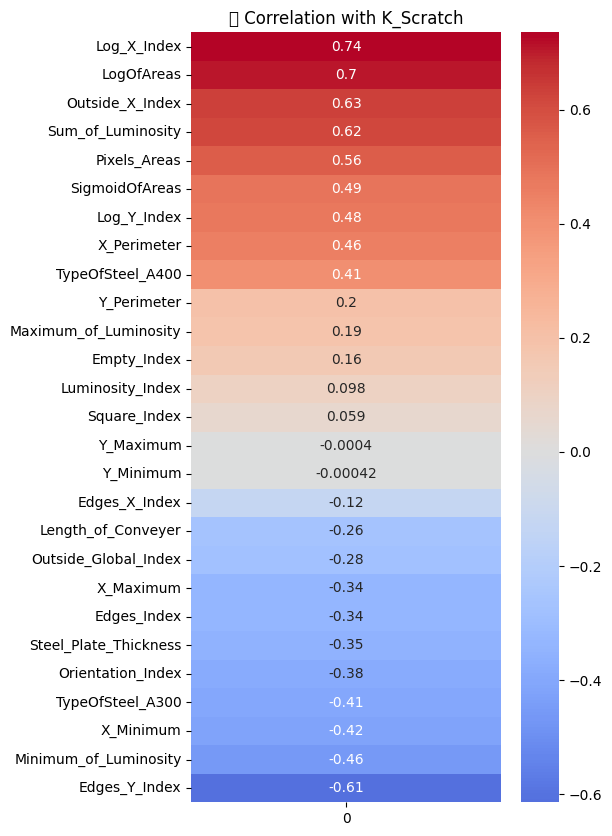

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# K_Scratch Í∏∞Ï§Ä ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ
corr_k = X.corrwith(y['K_Scratch']).sort_values(ascending=False)
plt.figure(figsize=(5, 10))
sns.heatmap(corr_k.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('üîπ Correlation with K_Scratch')
plt.show()

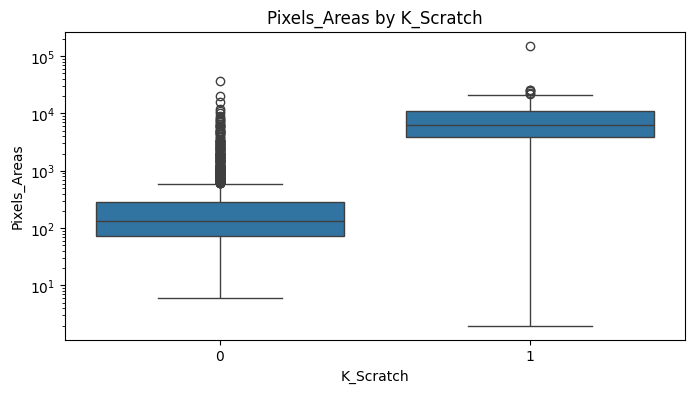

In [13]:
# ÌõÑÎ≥¥ 1: Pixels_Areas
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Pixels_Areas'])
plt.title('Pixels_Areas by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Pixels_Areas')
plt.yscale('log')  # Ïù¥ÏÉÅÏπò ÎåÄÎπÑ
plt.show()

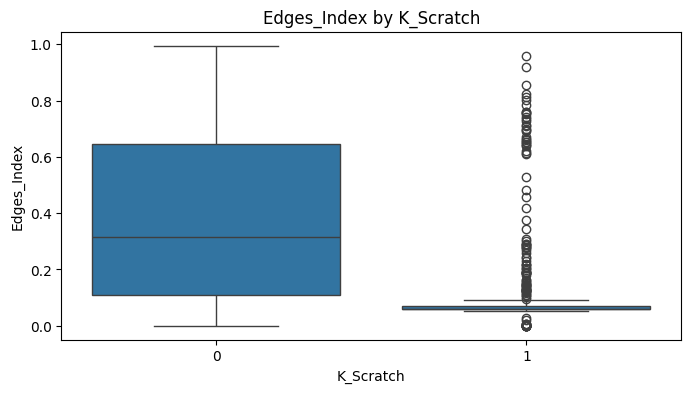

In [14]:
# ÌõÑÎ≥¥ 2: Edges_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Edges_Index'])
plt.title('Edges_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Edges_Index')
plt.show()

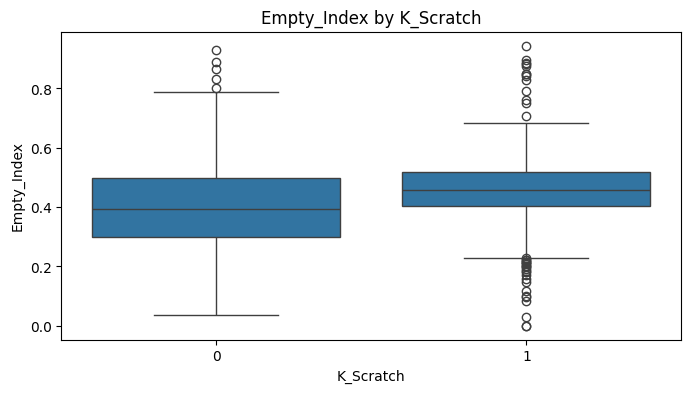

In [15]:
# ÌõÑÎ≥¥ 3: Empty_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Empty_Index'])
plt.title('Empty_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Empty_Index')
plt.show()

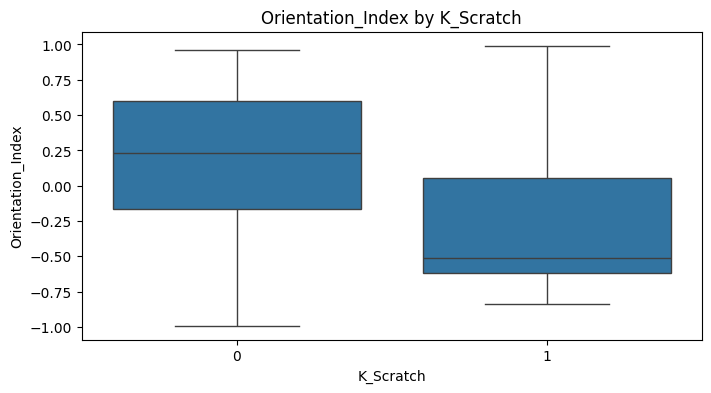

In [17]:
# ÌõÑÎ≥¥ 4: Orientation_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Orientation_Index'])
plt.title('Orientation_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Orientation_Index')
plt.show()

### K_ScratchÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Heatmap
ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§ÏùÑ Ï§ëÏã¨ÏúºÎ°ú, ÏïÑÎûò 4Í∞úÏùò Î≥ÄÏàòÎ•º ÌõÑÎ≥¥Î°ú ÏÑ†Ï†ïÌïòÏó¨ Î∞ïÏä§ÌîåÎ°ØÏùÑ ÌÜµÌï¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÏòÄÎã§.

- Pixels_Areas
- Edges_Index
- Empty_Index
- Orientation_Index

### ÌõÑÎ≥¥ Î≥ÄÏàò ÏãúÍ∞ÅÌôî Î∞è Ìï¥ÏÑù

Í∞Å Î≥ÄÏàòÏôÄ K_Scratch Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º boxplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìï¥ÏÑùÏù¥ Í∞ÄÎä•ÌïòÎã§:

| Î≥ÄÏàòÎ™Ö             | Ìï¥ÏÑù ÏöîÏïΩ |
|------------------|-----------|
| **Pixels_Areas**      | Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Î©¥Ï†ÅÏù¥ ÎÑìÍ≥† Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏïÑÏßÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ (Î°úÍ∑∏ Ïä§ÏºÄÏùº Ï†ÅÏö©) |
| **Edges_Index**       | Í≤∞Ìï®Ïù¥ ÏûàÎäî Í≤ΩÏö∞ Ïú§Í≥ΩÏÑ† ÏßÄÏàòÍ∞Ä Í∏âÍ≤©Ìûà ÎÇÆÏïÑÏßê |
| **Empty_Index**       | Í≤∞Ìï® Ïó¨Î∂ÄÏôÄ Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò Ï∞®Ïù¥Î•º Î≥¥ÏûÑ |
| **Orientation_Index** | Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Î∞©Ìñ•ÏÑ±Ïù¥ ÏûëÏïÑÏßÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ |

#### Ïôú Pixels_AreasÏôÄ Orientation_IndexÎ•º ÏµúÏ¢Ö Î≥ÄÏàòÎ°ú ÏÑ†Ï†ïÌñàÎäîÍ∞Ä?
1.	ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò 1Ï∞® ÌõÑÎ≥¥Íµ∞ ÏÑ†Ï†ï
‚Üí HeatmapÏùÑ ÌÜµÌï¥ K_ScratchÏôÄ ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 4Í∞ú Î≥ÄÏàò(Pixels_Areas, Edges_Index, Empty_Index, Orientation_Index)Î•º Ï∂îÏ∂ú
2.	Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Î∂ÑÌè¨ Ï∞®Ïù¥ ÌôïÏù∏
‚Üí Pixels_AreasÎäî Í≤∞Ìï® Ïó¨Î∂ÄÏóê Îî∞Îùº Î∂ÑÌè¨ Ï∞®Ïù¥Í∞Ä Îß§Ïö∞ ÌÅ¨Í≥† Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùå
‚Üí Orientation_IndexÎäî Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Î∞©Ìñ•ÏÑ±Ïù¥ ÌòÑÏ†ÄÌûà ÎÇÆÏïÑÏßê
3.	Î≥ÄÏàò Í∞Ñ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Í≥†Î†§
‚Üí Pixels_AreasÏôÄ Edges_IndexÎäî Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Îã¥ÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥ Îëò Îã§ ÏÇ¨Ïö©ÌïòÎ©¥ Ï§ëÎ≥µ Ïö∞Î†§ ÏûàÏùå
‚Üí Empty_IndexÎäî Í≤∞Ìï® Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î∂ÑÌè¨ Ï∞®Ïù¥Í∞Ä ÎπÑÍµêÏ†Å ÎöúÎ†∑ÌïòÏßÄ ÏïäÏùå

#### Í≤∞Î°†
ÏòàÏ∏°Î†•Í≥º Ìï¥ÏÑùÎ†•ÏùÑ Í≥†Î†§ÌïòÏó¨ Pixels_AreasÏôÄ Orientation_IndexÎ•º ÏµúÏ¢Ö Î≥ÄÏàòÎ°ú ÏÑ†Ï†ïÌïòÏòÄÎã§.

# Logistic Regression

## Z_Scratch ÏòàÏ∏° Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎßå Ï∂îÏ∂ú (Z_Scratch Ïö©)
X_model = X[['X_Perimeter', 'Y_Perimeter']]
y_model = y['Z_Scratch']

# 2. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42, stratify=y_model)

# 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ (ÌÜµÍ≥Ñ Í∏∞Î∞ò Ìï¥ÏÑù ÏúÑÌï¥ statsmodels ÏÇ¨Ïö©)
X_train_const = sm.add_constant(X_train)  # Ï†àÌé∏ Ï∂îÍ∞Ä
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 4. Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.313316
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Z_Scratch   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.02250
Time:                        16:23:54   Log-Likelihood:                -486.27
converged:                       True   LL-Null:                       -497.46
Covariance Type:            nonrobust   LLR p-value:                 1.375e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0653      0.102    -20.225      0.000      -2.265      -1.865
X_Perimeter    -0.0063    

### Z_Scratch Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

- **ÏÇ¨Ïö©Ìïú Î≥ÄÏàò**: `X_Perimeter`, `Y_Perimeter`
- **Pseudo R-squared**: 0.0225
- **Log-Likelihood**: -486.27

| Î≥ÄÏàòÎ™Ö           | Í≥ÑÏàò (coef) | P-value | Ìï¥ÏÑù ÏöîÏïΩ |
|------------------|-------------|---------|-----------|
| **const**        | -2.0653     | 0.000   | Ï†àÌé∏, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® |
| **X_Perimeter**  | -0.0063     | 0.000   | X Î∞©Ìñ• ÎëòÎ†àÍ∞Ä ÏßßÏùÑÏàòÎ°ù Z_Scratch Î∞úÏÉù ÌôïÎ•† Ï¶ùÍ∞Ä |
| **Y_Perimeter**  | 0.0057      | 0.011   | Y Î∞©Ìñ• ÎëòÎ†àÍ∞Ä Í∏∏ÏàòÎ°ù Z_Scratch Î∞úÏÉù ÌôïÎ•† Ï¶ùÍ∞Ä |

- **ÌöåÍ∑ÄÏãù**:  
  `log(p / (1 - p)) = -2.0653 - 0.0063 √ó X_Perimeter + 0.0057 √ó Y_Perimeter`

> Îëê Î≥ÄÏàò Î™®Îëê P-valueÍ∞Ä 0.05 ÎØ∏ÎßåÏúºÎ°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎ©∞, Z_Scratch Í≤∞Ìï® Î∞úÏÉùÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.  
> Í∑∏Îü¨ÎÇò **Pseudo R¬≤ = 0.0225**Î°ú ÏÑ§Î™ÖÎ†•Ïù¥ ÎÇÆÏïÑ Î™®Îç∏ ÏÑ±Îä•ÏóêÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÎã§.

## K_Scratch ÏòàÏ∏° Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù

In [22]:
# K_Scratch Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù ÏΩîÎìú (ÌÜµÍ≥Ñ Í∏∞Î∞ò)
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
X_k = X[['Pixels_Areas', 'Orientation_Index']]
y_k = y['K_Scratch']

# 2. train/test Î∂ÑÌï†
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.2, random_state=42, stratify=y_k)

# 3. Ï†àÌé∏ Ï∂îÍ∞Ä
X_train_k_const = sm.add_constant(X_train_k)

# 4. Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ™®Îç∏ Ï†ÅÌï©
logit_model_k = sm.Logit(y_train_k, X_train_k_const)
result_k = logit_model_k.fit()

# 5. Í≤∞Í≥º Ï∂úÎ†•
print(result_k.summary())

Optimization terminated successfully.
         Current function value: 0.221509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              K_Scratch   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.5594
Time:                        16:26:47   Log-Likelihood:                -343.78
converged:                       True   LL-Null:                       -780.22
Covariance Type:            nonrobust   LLR p-value:                2.878e-190
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9707      0.133    -22.296      0.000      -3.232      -2.710
Pixels_A

### K_Scratch Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

- **ÏÇ¨Ïö©Ìïú Î≥ÄÏàò**: `Pixels_Areas`, `Orientation_Index`
- **Pseudo R-squared**: 0.5594
- **Log-Likelihood**: -343.78

| Î≥ÄÏàòÎ™Ö               | Í≥ÑÏàò (coef) | P-value | Ìï¥ÏÑù ÏöîÏïΩ |
|--------------------|--------------|---------|-----------|
| **const**              | -2.9707      | 0.000   | Ï†àÌé∏, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® |
| **Pixels_Areas**       | 0.0006       | 0.000   | Î©¥Ï†ÅÏù¥ ÎÑìÏùÑÏàòÎ°ù K_Scratch Î∞úÏÉù ÌôïÎ•† Ï¶ùÍ∞Ä |
| **Orientation_Index**  | -1.7081      | 0.000   | Î∞©Ìñ•ÏÑ±Ïù¥ ÎÇÆÏùÑÏàòÎ°ù K_Scratch Î∞úÏÉù ÌôïÎ•† Ï¶ùÍ∞Ä |

- **ÌöåÍ∑ÄÏãù**:  
  `log(p / (1 - p)) = -2.9707 + 0.0006 √ó Pixels_Areas - 1.7081 √ó Orientation_Index`

> ‚Üí Îëê Î≥ÄÏàò Î™®Îëê P-valueÍ∞Ä 0.05 ÎØ∏ÎßåÏúºÎ°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎ©∞, K_Scratch Î∞úÏÉùÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

# Modeling Results Summary

Z_Scratch Î∞è K_ScratchÏóê ÎåÄÌï¥ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÌÜµÍ≥Ñ Í∏∞Î∞òÏúºÎ°ú ÌïôÏäµÌïòÍ≥†, ÏÑ§Î™ÖÎ†•(Pseudo R¬≤), Ï†ïÌôïÎèÑ, ÌöåÍ∑ÄÏãùÏùÑ ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏöîÏïΩÌïòÏòÄÎã§.

### Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ

| Target        | Pseudo R¬≤ | Ï†ïÌôïÎèÑ (Accuracy) | ÌöåÍ∑ÄÏãù |
|---------------|------------|-------------------|--------|
| **Z_Scratch** | 0.0225     | ÏïΩ 88.7%           | `log(p/(1-p)) = -2.0653 - 0.0063 √ó X_Perimeter + 0.0057 √ó Y_Perimeter` |
| **K_Scratch** | 0.5594     | ÏïΩ 94.5%           | `log(p/(1-p)) = -2.9707 + 0.0006 √ó Pixels_Areas - 1.7081 √ó Orientation_Index` |

- `p`Îäî Í∞ÅÍ∞Å Z_Scratch ÎòêÎäî K_ScratchÍ∞Ä Î∞úÏÉùÌï† ÌôïÎ•†ÏùÑ ÏùòÎØ∏Ìï®  
- Pseudo R¬≤Îäî Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏùåÏùÑ ÏùòÎØ∏  
- Ï†ïÌôïÎèÑÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÏùò **accuracy** Í∏∞Ï§Ä

---

### ÌöåÍ∑ÄÍ≥ÑÏàò Ìï¥ÏÑù

#### Z_Scratch  
- `X_Perimeter`Ïùò Í≥ÑÏàòÍ∞Ä **ÏùåÏàò** ‚Üí Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù X Î∞©Ìñ• ÎëòÎ†àÍ∞Ä **ÏûëÏïÑÏßÄÎäî Í≤ΩÌñ•**  
- `Y_Perimeter`Ïùò Í≥ÑÏàòÍ∞Ä **ÏñëÏàò** ‚Üí Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Y Î∞©Ìñ• ÎëòÎ†àÍ∞Ä **Ïª§ÏßÄÎäî Í≤ΩÌñ•**

#### K_Scratch  
- `Pixels_Areas`Ïùò Í≥ÑÏàòÍ∞Ä **ÏñëÏàò** ‚Üí Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Ï†ÑÏ≤¥ Î©¥Ï†ÅÏù¥ **Ïª§ÏßÄÎäî Í≤ΩÌñ•**  
- `Orientation_Index`Ïùò Í≥ÑÏàòÍ∞Ä **ÏùåÏàò** ‚Üí Í≤∞Ìï®Ïù¥ ÏûàÏùÑÏàòÎ°ù Î∞©Ìñ•ÏÑ±Ïù¥ **ÏïΩÌï¥ÏßÄÎäî Í≤ΩÌñ•**

# End of Documents